In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#library yang digunakan
import cv2 
import os 
from google.colab.patches import cv2_imshow 
import numpy as np
import matplotlib.pyplot as plt
from random import random


# Load data

In [ ]:
# File dataset ada di Shared drives pada Google Drive
path = "/content/drive/Shareddrives/flowers"
kelas = ['daisy', 'dandelion', 'sunflower'] #kelas/category

#load file names
data = []
dataLabel = []
for category in kelas:
  flower_folder = os.path.join(path, category)
  file_names = os.listdir(flower_folder)
  full_path = [os.path.join(flower_folder, file_name) for file_name in file_names]
  data.append(full_path)
  for citra in file_names:
      full_path = os.path.join(flower_folder, citra)
      if category == 'daisy':
        label =  0
      elif category == 'dandelion':
        label =  1
      elif category == 'sunflower':
        label = 2
      dataLabel.append(label)

In [ ]:
#load images dan mengubahnya menjadi grayscale
images = []
for names in data:
    one_category_images = [cv2.imread(name,0) for name in names if (cv2.imread(name,0)) is not None]
    images.append(one_category_images)

In [ ]:
#resize
dim = (320, 240)
imageAkhir = []
for i,imgs in enumerate(images):
    imageAkhir.append([cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC) for img in imgs])

contoh citra setiap kelas


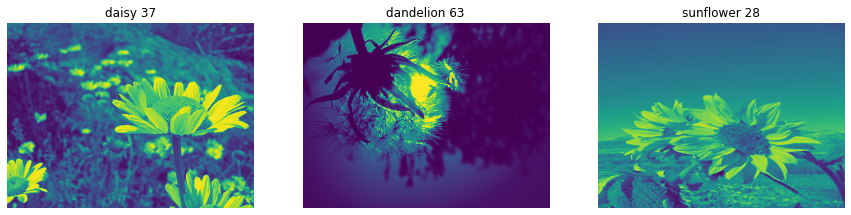

contoh citra setelah resize dan grayscale


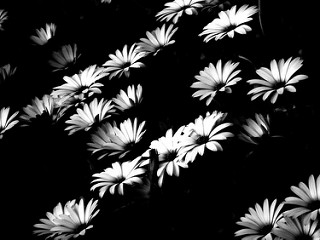

In [ ]:
#visualisasi contoh data
print("contoh citra setiap kelas")
plt.figure(figsize=(15,10))
for i, imgs in enumerate(imageAkhir):
    plt.subplot(1,3,i+1)
    plt.axis('off')
    idx = np.random.randint(len(imgs))
    plt.imshow(imgs[idx])
    plt.title(kelas[i]+' '+str(idx))
plt.show()

print("contoh citra setelah resize dan grayscale")
cv2_imshow(imageAkhir[0][22])

# Backpropagation

In [ ]:
#e. fungsi aktivasi dengan sigmoid 
def activation(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
#g. MLP- menghitung error
def error(actual, predicted):
  return 1/2*(predicted - actual)**2
  

In [ ]:
from random import random
#f. MLP- inisialisasi bobot bias
def inisialisasi(nInput, nHidden, nOut):
  net = []
  hiddenlayer = [{'w':[random() for i in range(nInput + 1)]} for i in range(nHidden)]
  outputlayer = [{'w':[random() for i in range(nHidden + 1)]} for i in range(nOut)]
  net.append(hiddenlayer)
  net.append(outputlayer)
  return net


In [ ]:
#h. MLP- feedforward
def result(weight, theta):
  result = weight[-1]
  for i in range(len(weight)-1):
    result += weight[i] * theta[i]
  return result
  
def feedforward(net, pix):
  inputs = pix
  for layer in net:
    nextinput = []
    for n in layer:
      hsl = result(n['w'], inputs)
      n['out'] = activation(hsl)
      nextinput.append(n['out'])

    inputs = nextinput
  return inputs

In [ ]:
#i. MLP- update bobot backward
def delta(output):
  return output*(1.0-output)
  
def backward(network, target):
  for i in reversed(range(len(network))):
    layer = network[i]
    errors = []
  #hidden to input
    if i != len(network)-1:
      for j in range(len(layer)):
        e = 0.0
        for n in network[i+1]:
          e += (n['w'][j]*n['delta'])
          errors.append(e)
    #output to hidden
    else:
      for j in range(len(layer)):
        n = layer [j]
        errors.append(target[j]-n['out'])
    for j in rangle(len(layer)):
      n = layer[j]
      n['delta'] = errors[j]*delta(n['out'])

def update_weight(network, theta, lr):
  for i in range(len(network)):
    inputs = theta[:-1] if i==0 else [n['output'] for n in network[i-1]]
    for n in network[i]:
      for j in range(len(inputs)):
        n['w'][j] = n['w'][j] + lr*n['delta']*inputs[j]
      n['w'][-1] = n['w'][-1] + lr*n['delta']

In [ ]:
#j. MLP- prediksi
def prediction(activation):
  if activation >= 0.5:
    prediction = 1.0
  else: 
    prediction = 0.0
  return prediction

In [ ]:
#k. MLP- fungsi akurasi
def accuracy_function(actual, predicted):
  correct = 0
  for i in range(len(actual)):
    if actual[1] == predicted[i]:
      correct += 1
  return correct/float(len(actual))

# Training

In [ ]:
def train_network(network, train, lr,epoch, n_out):
  err = []
  acc=[]
  for ep in range(epoch):
    true = 0
    sumerror = 0
    exp = []
    pred = []
    for pix in train:
      outputs = feedforward(network, data)
      expected = [0 for i in range(n_out)]
      expected[train[pix]] = 1.0
      sumerror += sum([er(expected[i], (outputs[i]))for i in range (len(expected))])
      backward(network, expected)
      updateweight(network, data, lr)
      outputs = prediction(outputs)

      if (expected == outputs):
        true+=1
    err.append(sumerror/len(train))
    acc.append(true/len(train))      
    print(epoch, "\t", "Error: ", err[-1], "\t| accuracy: ", acc[-1])
  return err, acc, network

In [ ]:
def test_network(network, test, lr,epoch, n_out):
  err = []
  acc = []
  for ep in range(epoch):
    true = 0
    sumerror = 0
    exp = []
    pred = []
    for pix in train:
      outputs = feedforward(network, data)
      expected = [0 for i in range(n_out)]
      expected[train[pix]] = 1.0
      sumerror += sum([er(expected[i], (outputs[i]))for i in range (len(expected))])
      backward(network, expected)
      updateweight(network, data, lr)
      outputs = prediction(outputs)

      if (expected == outputs):
        true+=1
    err.append(sumerror/len(train))
    acc.append(true/len(train))
    print(epoch, "\t", "Error: ", err[-1], "\t| accuracy: ", acc[-1])
  return err, acc, network

In [ ]:
from sklearn.model_selection import train_test_split
#l. MLP - mendefinisikan fungsi untuk training (80%) dan testing (20%)
ArrayimageAkhir = imageAkhir[0]+imageAkhir[1]+imageAkhir[2]

X_train, X_test, Y_train, Y_test  = train_test_split(ArrayimageAkhir, dataLabel,train_size=0.8, random_state = 1 )

lenTrainImage= len(X_train)
print("jumlah citra training : ",lenTrainImage)
lenTestImage= len(X_test)
print("jumlah citra test : ",lenTestImage)

jumlah citra training :  240
jumlah citra test :  60


In [ ]:
#learning rate 0.1
dataset = X_train
n_inputs = len(dataset[0])-1
n_outputs = 3
network = inisialisasi(n_inputs, 10, n_outputs)
train_arr1, train_error1, train_network1 = train_network(network, dataset, 0.1, 50, n_outputs)
test_arr1, test_error1, test_network1 = test_network(network, dataset, 0.1, 50, n_outputs)

TypeError: ignored

In [ ]:
#learning rate 0.8
dataset = X_train
n_inputs = len(dataset[0])-1
n_outputs = 3
network = inisialisasi(n_inputs, 1, n_outputs)
train_arr2, train_error2, train_network2 = train_network(network, dataset, 0.8, 50, n_outputs)
test_arr2, test_error2, test_network2 = test_network(network, dataset, 0.8, 50, n_outputs)

TypeError: ignored

# Visualisasi Error dan Akurasi

In [ ]:
# Visualisasikan akurasi setiap 50 epoch, learning rate = 0.1
import matplotlib.pyplot as plt

epoch = range(50)
plt.plot(epoch, train_arr1, label="Akurasi data training")
plt.plot(epoch, test_arr1, label="Akurasi data test")
plt.title("Grafik Akurasi dengan learning Rate = 0.1")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

NameError: ignored

In [ ]:
# Visualisasikan error setiap 50 epoch, learning rate = 0.1

plt.plot(epoch, train_error1, label="Error data training")
plt.plot(epoch, test_error1, label="Error data test")
plt.title("Grafik Error dengan learning Rate = 0.1")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(loc='lower right')

NameError: ignored

In [ ]:
# Visualisasikan akurasi setiap 50 epoch, learning rate = 0.8

plt.plot(epoch, train_arr2, label="Akurasi data training")
plt.plot(epoch, test_arr2, label="Akurasi data test")
plt.title("Grafik Akurasi dengan learning Rate = 0.8")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

NameError: ignored

In [ ]:
# Visualisasikan error setiap 50 epoch, learning rate = 0.8

plt.plot(epoch, train_error2, label="Error data training")
plt.plot(epoch, test_error2, label="Error data test")
plt.title("Grafik Error dengan learning Rate = 0.8")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend(loc='lower right')

NameError: ignored